# Convex optimization applications

### Lowner-John Ellipsoid

Finds minimum volume ellipsoid around a finite set of points (2d in this case)

An ellipse can be represented as $\{ v \text{ | } ||Av+b||_2 <= 1\}$

Thus, the constraint to contain all points is: $||Ax_i + b ||_2 <= 1$ for all $x_i$

We can minimize the volume of the ellipse by minimizing $log(det(inv(A)))$, because the volume of the ellipse is proportional to $det(inv(A))$. Intuition for this is that as values in A get larger, v must be smaller to keep $||Ax_i + b ||_2 <= 1$

But we can't do $inv$ in Convex.jl so we instead _maximize_ $logdet(A)$. $logdet$ also adds an implicit constraint that A is symmetric positive-definite


First, we load the necessary libraries. Thig might take a while

In [1]:
using PyPlot
using Convex, SCS
set_default_solver(SCSSolver(verbose=0))

INFO: Precompiling module PyPlot.
INFO: Precompiling module Convex.

Use "abstract type Vexity end" instead.

Use "abstract type Monotonicity end" instead.

Use "abstract type Sign end" instead.

Use "abstract type AbstractExpr end" instead.

Use "abstract type Constraint end" instead.

Use "const Value = Union{Number,AbstractArray}" instead.

Use "const ValueOrNothing = Union{Value,Void}" instead.

Use "const AbstractExprOrValue = Union{AbstractExpr,Value}" instead.

Use "const Float64OrNothing = Union{Float64,Void}" instead.

Use "function Base.broadcast(::typeof(+), ...)" instead.

Use "function Base.broadcast(::typeof(+), ...)" instead.

Use "function Base.broadcast(::typeof(+), ...)" instead.

Use "function Base.broadcast(::typeof(-), ...)" instead.

Use "function Base.broadcast(::typeof(-), ...)" instead.

Use "function Base.broadcast(::typeof(-), ...)" instead.

Use "function Base.broadcast(::typeof(*), ...)" instead.

Use "function Base.broadcast(::typeof(*), ...)" instead.

Us

SCS.SCSSolver(Any[(:verbose, 0)])

Pick points

In [7]:
n_dims = 3

# Points
if n_dims==2
     x = [10 0;
          0 5;
          1 1]
elseif n_dims==3
     x = [10 0 0;
          0 10 0
          0 0 10;
          10 10 10]
else
     x = rand(n_dims+1, n_dims)
end


3×2 Array{Int64,2}:
 10  0
  0  5
  1  1

In [9]:
# Set up problem
A = Variable(n_dims,n_dims)
b = Variable(n_dims)

objective = logdet(A)

constraints = (norm(A*x[1,:]+b) <= 1)
for i in 2:size(x)[1]
     constraints += (norm(A*x[i,:]+b) <= 1)
end

problem = maximize(objective, constraints)

Problem:
maximize AbstractExpr with
head: logdet
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.ConcaveVexity()

subject to
Constraint:
<= constraint
lhs: AbstractExpr with
head: norm2
size: (1, 1)
sign: Convex.Positive()
vexity: Convex.ConvexVexity()

rhs: 1
vexity: Convex.ConvexVexity()
		Constraint:
<= constraint
lhs: AbstractExpr with
head: norm2
size: (1, 1)
sign: Convex.Positive()
vexity: Convex.ConvexVexity()

rhs: 1
vexity: Convex.ConvexVexity()
		Constraint:
<= constraint
lhs: AbstractExpr with
head: norm2
size: (1, 1)
sign: Convex.Positive()
vexity: Convex.ConvexVexity()

rhs: 1
vexity: Convex.ConvexVexity()
current status: not yet solved

In [10]:
solve!(problem)

# Results
println("Problem status: ", problem.status)
println("Optimal value: ", problem.optval)
println("A: ", A.value)
println("b: ", b.value)
A = A.value
b = b.value

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{DataStructures.OrderedDict{UInt64,Tuple{Union{AbstractArray, Number},Union{AbstractArray, Number}}}}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.ExpConstraint, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/constraints/exp_constraints.jl:52
 [4] conic_form!(::Convex.LogAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/exp_cone/log.jl:55
 [5] conic_form!(::Convex.SumAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/sum.jl:48
 [6] conic_form!(::Convex.LogDetAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/exp_+_sdp_cone/logdet.jl:38
 [7] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [8] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/constraints/constrai

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.CTransposeAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/transpose.jl:115
 [4] conic_form!(::Convex.HcatAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/stack.jl:47
 [5] conic_form!(::Convex.TransposeAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/transpose.jl:44
 [6] conic_form!(::Convex.HcatAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/stack.jl:47
 [7] conic_form!(::Convex.TransposeAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/transpose.jl:44
 [8] conic_form!(::Convex.DotMultiplyAtom, ::Convex.UniqueConicForms) at /home/kazu/.julia/v0.6/Convex/src/atoms/affine/multiply_divide.jl:175
 [9] conic_form!(::Convex.IndexAtom, ::Convex.UniqueConicForms) at /home/kazu/.

Problem status: Optimal
Optimal value: 

isnan{T <: Number}(x::AbstractArray{T}) is deprecated, use isnan.(x) instead.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] isnan(::Array{Float64,1}) at ./deprecated.jl:57
 [3] populate_solution!(::SCS.SCSMathProgModel, ::Convex.Problem, ::Dict{UInt64,Tuple{Int64,Int64}}, ::Array{Convex.ConicConstr,1}) at /home/kazu/.julia/v0.6/Convex/src/solution.jl:118
 [4] #solve!#25(::Bool, ::Bool, ::Bool, ::Function, ::Convex.Problem) at /home/kazu/.julia/v0.6/Convex/src/solution.jl:38
 [5] solve!(::Convex.Problem) at /home/kazu/.julia/v0.6/Convex/src/solution.jl:21
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/kazu/.julia/v0.6/IJulia/src/execute_request.jl:160
 [8] eventloop(::ZMQ.Socket) at /home/kazu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##11#14)() at ./task.jl:335
while loading In[10], in expression starting on line 1


-2.6001457566318957
A: [0.193244 0.118632; 0.118632 0.456954]
b: [-0.94576; -1.34902]


2×1 Array{Float64,2}:
 -0.94576
 -1.34902

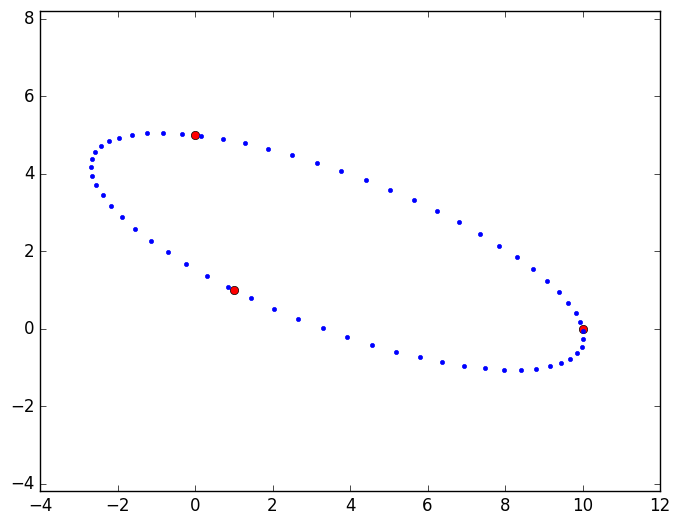

(-4.0, 12.0, -2.0, 6.0)

In [11]:
# Plot

angles = collect(0 : 0.1 : 2*pi)
if n_dims==2
     vecs = [cos.(angles)-b[1] sin.(angles)-b[2]]'
     ellipse = inv(A) * vecs

     for i in 1:size(x)[1]
          plot(x[i,1], x[i,2], "ro")
     end

     plot(ellipse[1,:], ellipse[2,:], "b.")
     axis("equal")
elseif n_dims==3
     vecs = []
     for i in angles
          for j in angles
               v = [cos.(i).*sin.(j)-b[1] sin.(i).*sin.(j)-b[2] cos.(j)-b[3]]
               if isempty(vecs)
                    vecs = v
               end
               vecs = [vecs; v]
          end
     end

     for i in 1:size(x)[1]
          plot3D([x[i,1]], [x[i,2]], [x[i,3]], "ro")
     end

     ellipse = inv(A)*vecs'
     plot3D(ellipse[1,:], ellipse[2,:], ellipse[3,:], "b.", markersize=1)
     axis("equal")
end